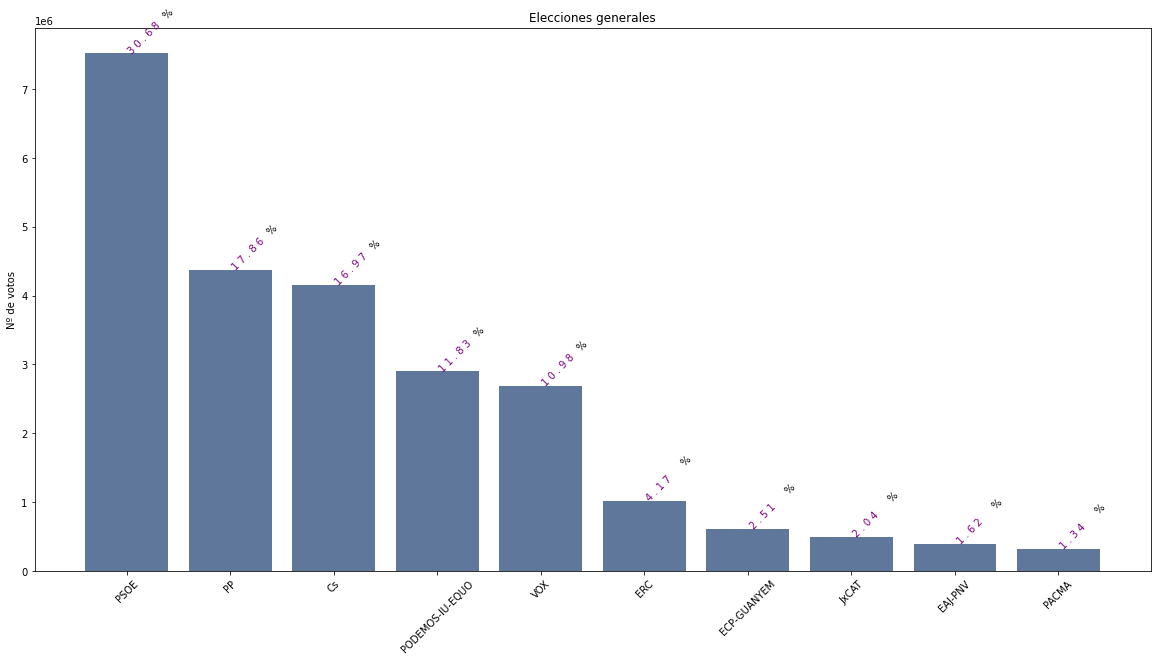

In [203]:
# Histogram creation
"""
Input: ​
Una lista de matrices numpy con distribuciones de números.
Lista con encabezados de texto para cada distribución
Tamaño

Output:
un gráfico con:
Creación de histograma
Líneas verticales promedio y 4 cuartiles
3 líneas verticales sigma
Número de observaciones en escala logarítmica.
N distribuciones diferentes
"""

# Respuesta
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats 


Partido = ["PSOE", "PP", "Cs", "PODEMOS-IU-EQUO", "VOX", "ERC", "ECP-GUANYEM",	"JxCAT",	"EAJ-PNV", "PACMA"]
Votos = [7513142, 4373653, 4155665,	2897419,	2688092,	1020392,	615665,	500787,	395884,	328299]
Diputados = [123, 66, 57, 33, 24, 15, 7, 7, 6, 0]

fig, ax = plt.subplots(figsize=(20, 10))
posicion_x = np.arange(len(Partido))

plt.bar(posicion_x, Votos, align = "center")
plt.xticks(posicion_x, Partido, rotation=45)
plt.ylabel('Nº de votos')
plt.title("Elecciones generales")


suma = 0
i = 0
for elem in Votos:
  suma += elem
  i += 1


for x,y in enumerate(Votos):
    plt.text(x,y," ".join(str(round((y/suma)*100,2))), color = 'purple', rotation=45)
    plt.text(x,y,"                %", rotation=45)
    


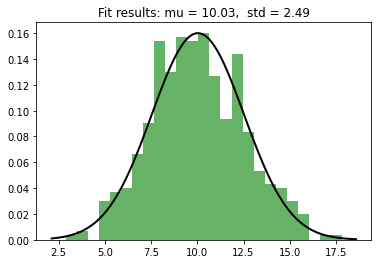

In [171]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

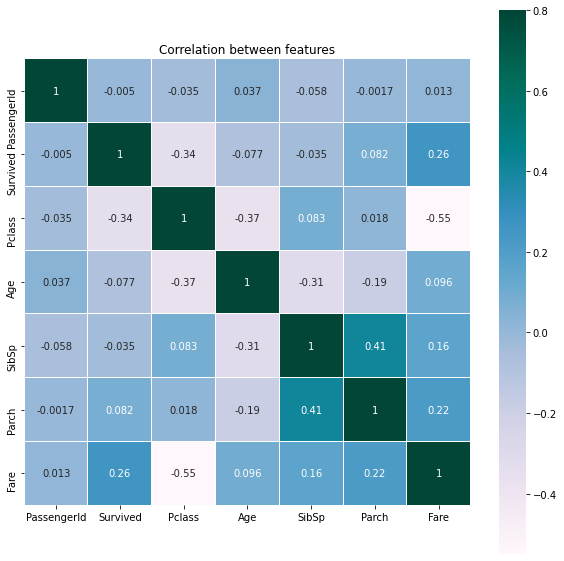

In [199]:
# We can use the pandas library in python to read in the csv file.
import pandas as pd
#for numerical computaions we can use numpy library
import numpy as np

# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("train.csv")
# Print the first 5 rows of the dataframe.
titanic.head()
#Let's check the number of rows and counts
#Describe gives statistical information about numerical columns in the dataset
titanic.describe()
#you can check from count if there are missing vales in columns, here age has got missing values
titanic_test = pd.read_csv("test.csv")
#transpose
titanic_test.head().T
#note their is no Survived column here which is our target varible we are trying to predict

corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True,cmap='PuBuGn',linecolor="white")
plt.title('Correlation between features');

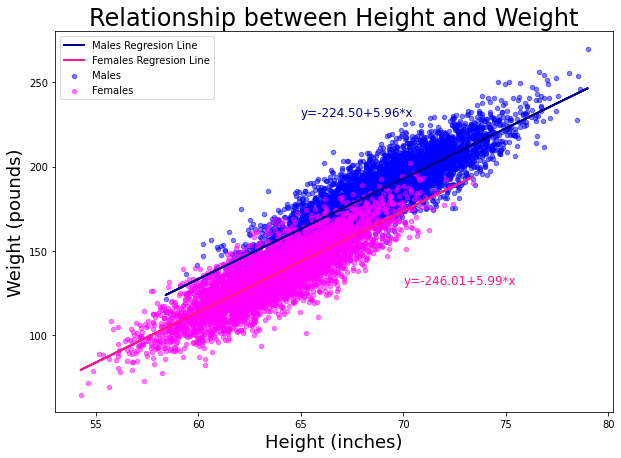

In [213]:
import pandas as pd

# read the csv file
df = pd.read_csv('weight-height.csv')

# print the first 5 rows of the data set
df.head()

# best fit polynomials

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([   5.96177381, -224.49884071])

# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([   5.99404661, -246.01326575])
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


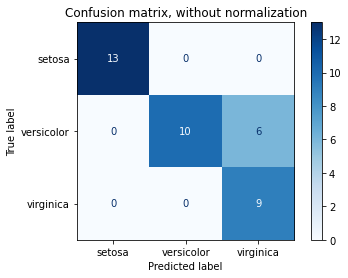

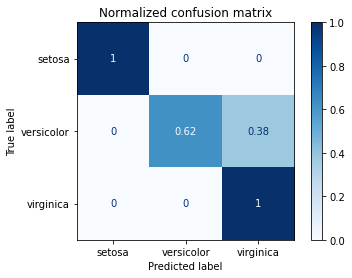

In [217]:
#Confussion Matrix

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

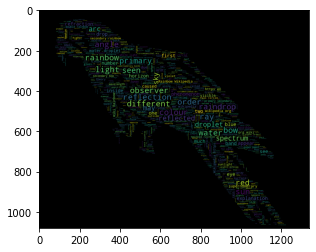

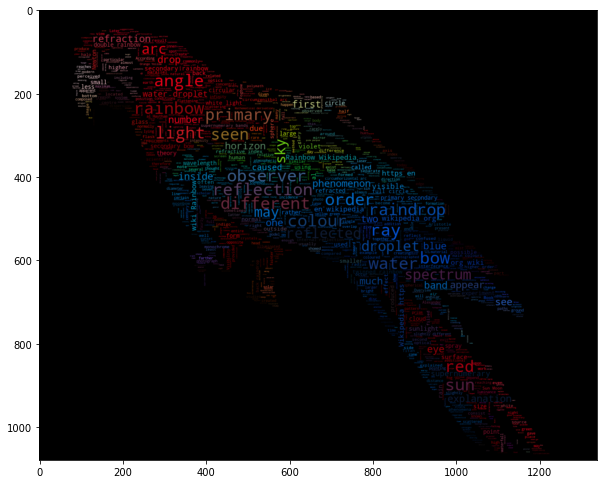

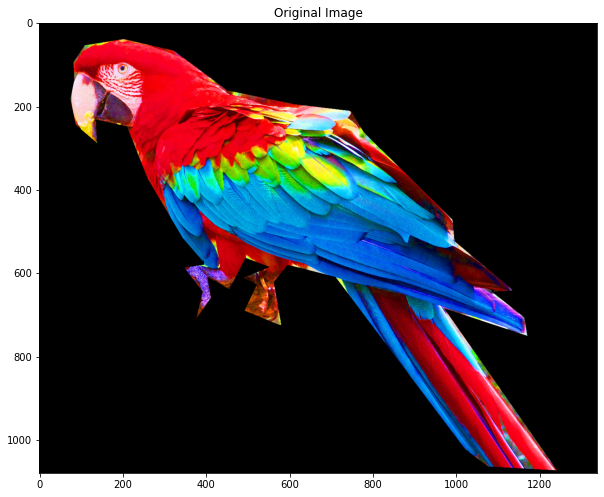

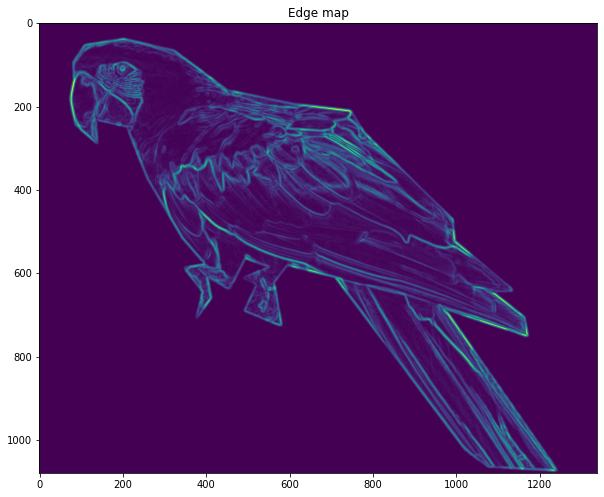

In [223]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = open(os.path.join(d, 'wiki_rainbow.txt')).read()

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()
